<a href="https://colab.research.google.com/github/Khan-solo/Kernel-SVM-Classification/blob/main/Kernel_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score, ConfusionMatrixDisplay
np.set_printoptions(suppress= True)

Importing the dataset

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Machine learning/Classification/Logistic Regression/Social_Network_Ads.csv")
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# Splitting dataset into train and test set

In [ ]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 0)

# Freature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Training the Logistic Regression Model

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel="rbf")
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Predicting a new Result

In [ ]:
classifier.predict(sc.transform([[30, 87000]]))

array([0])

# Predicting the Test Set result

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

# Creating the Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy= " + str(accuracy_score(y_test, y_pred)))

[[64  4]
 [ 3 29]]
Accuracy= 0.93


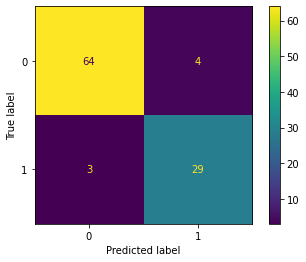

In [ ]:
ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot()